In [9]:
# Let's find the best neighborhood of Milan for wine lovers
import pandas as pd
!pip install wikipedia
!pip install folium
!pip install geopy
!pip install geopandas
!pip install geojson

#I've found the list of Neighborhoods of Milan with relative latitudes and longitudes in the municipality website directory below
Milan_data = pd.read_csv('https://dati.comune.milano.it/dataset/e8e765fc-d882-40b8-95d8-16ff3d39eb7c/resource/3fce7202-0076-4a7b-ac2c-d2ab9b5dc658/download/ds964_nil_wm_4326.csv', delimiter=';')


In [10]:
#lets take a look to the data
MD0=Milan_data.drop(columns=['ID_NIL','Valido_dal', 'Valido_al', 'Fonte', 'Shape_Length', 'Shape_Area', 'OBJECTID', 'Location'])
MD=MD0.rename(columns={"NIL": "Neighborhood", "LONG_X_4326_CENTROID": "Longitude", "LAT_Y_4326_CENTROID":"Latitude"})
MD.head()

,Neighborhood,Longitude,Latitude
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460
1,TRENNO,9.101675,45.492822
2,PORTELLO,9.153947,45.484490
3,BOVISASCA,9.156731,45.517433
4,PARCO NORD,9.184235,45.523514


In [11]:
#let's find the coordinates of Milan
import pandas as pd
from pandas.io.json import json_normalize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import wikipedia as wp
import requests
from bs4 import BeautifulSoup
import numpy as np 
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium 
from folium import plugins
from folium.plugins import HeatMap

address = 'Milano, Italy'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Milan are 45.4668, 9.1905.


In [12]:
# let's plot the map of Milan

map_milan = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for Latitude, Longitude, Neighborhood in zip(MD['Latitude'], 
                                           MD['Longitude'], 
                                           MD['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milan)  
    
map_milan

In [75]:
#Let's extract the venues for each neighborhood using foursquare

CLIENT_ID = '0UYD3HV2JM4JBY40LI5OTDF24XZD3MEENNWMIYCATT0UIDFI'
CLIENT_SECRET = '5FDGC2J33OIVUQFJB4EQQZ40XC2IZJJTPHN1INPDHYXHLNYS'
VERSION = '20200605'
LIMIT = 100 # limit of number of venues returned by Foursquare API
categoryId='4bf58dd8d48988d123941735'
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
           

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)




In [76]:
milan_winebars = getNearbyVenues(names=MD['Neighborhood'],
                                   latitudes=MD['Latitude'],
                                   longitudes=MD['Longitude']
                                  )
print(milan_winebars.shape)
milan_winebars.head()



RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
TRENNO
PORTELLO
BOVISASCA
PARCO NORD
FIGINO
LORETO - CASORETTO - NOLO
QUARTO OGGIARO - VIALBA - MUSOCCO
ISOLA
QUARTO CAGNINO
STADIO - IPPODROMI
QUINTO ROMANO
DUOMO
GUASTALLA
SAN SIRO
COMASINA
TIBALDI
GRECO - SEGNANO
DE ANGELI - MONTE ROSA
FARINI
BRUZZANO
QT 8
STEPHENSON
CANTALUPA
QUINTOSOLE
PARCO SEMPIONE
BARONA
VILLAPIZZONE - CAGNOLA - BOLDINASCO
PARCO BOSCO IN CITTA'
GORLA - PRECOTTO
NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI
TRIULZO SUPERIORE
PTA ROMANA
TALIEDO - MORSENCHIO - Q.RE FORLANINI
PORTA TICINESE - CONCA DEL NAVIGLIO
TRE TORRI
ASSIANO
MORIVIONE
VIGENTINO - Q.RE FATIMA
BICOCCA
ORTOMERCATO
LODI - CORVETTO
MUGGIANO
PORTA TICINESE - CONCHETTA
UMBRIA - MOLISE - CALVAIRATE
ROSERIO
RONCHETTO DELLE RANE
Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO
MONLUE' - PONTE LAMBRO
PADOVA - TURRO - CRESCENZAGO
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
PORTA MAGENTA
FORZE ARMATE
GHISOLFA
CHIARAVALLE
PARCO DELLE ABBAZIE
MACI

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PORTELLO,45.484490,9.153947,Urban Food,45.487050,9.155120,Wine Bar
1,ISOLA,45.490894,9.189617,Il Borsieri,45.489456,9.189092,Wine Bar
2,ISOLA,45.490894,9.189617,Cantine Milano,45.490012,9.190418,Wine Bar
3,ISOLA,45.490894,9.189617,Ebrezza,45.488365,9.189756,Wine Bar
4,ISOLA,45.490894,9.189617,Frida,45.488718,9.187129,Cocktail Bar


In [77]:
#let's explore the data
MDA1=milan_winebars[["Neighborhood","Venue Category"]]
MDA2=MDA1.loc[MDA1['Venue Category']=='Wine Bar']
MDA=MDA2.groupby(["Neighborhood"]).count()
MDA.sum()


Venue Category    73
dtype: int64

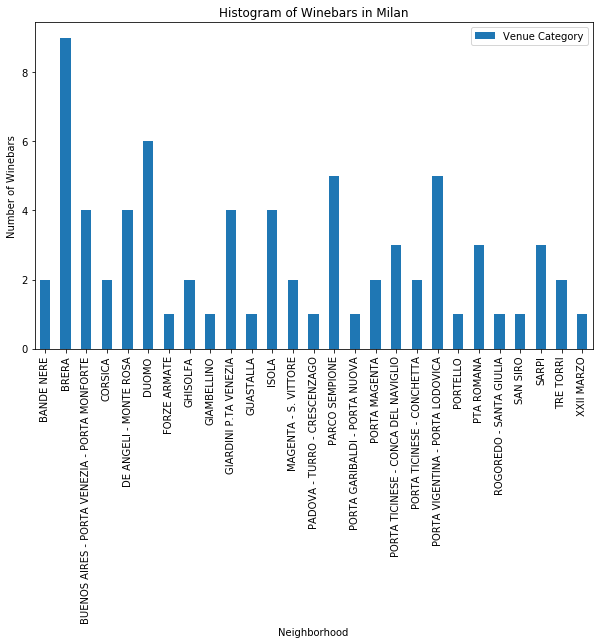

In [78]:
MDA.plot(kind='bar', figsize=(10, 6))

plt.title('Histogram of Winebars in Milan') # add a title to the histogram
plt.ylabel('Number of Winebars') # add y-label
plt.xlabel('Neighborhood') # add x-label

plt.show()

In [ ]:
#we can conclude that the best neighborhood for wine bars in Milan is Brera.